## MNIST Project 

The MNIST dataset is one of the most famous datasets in the field of machine learning and computer vision. It is often used for training and testing image processing systems, especially for the task of handwritten digit recognition.

**Key Features of the MNIST Dataset**
**Contents:**

The MNIST dataset contains 70,000 images of handwritten digits.
Each image represents a digit from 0 to 9.

**Image Properties:**

Each image is a grayscale image with a resolution of 28x28 pixels.
The pixel values range from 0 (black) to 255 (white).

**Dataset Split:**

The dataset is typically split into a training set of 60,000 images and a test set of 10,000 images.

**Labels:**

Each image has an associated label indicating the digit it represents (0 through 9).


In [1]:
#This code is included because the configured environment does not include seaborn package
#pip install seaborn 

#### Part 1 - Data Preprocessing 



##### 1. Data Loading

In [2]:
import sklearn as sklearn

# Import the fetch_openml function from sklearn.datasets
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract the data and target as numpy arrays 
X, y = mnist['data'], mnist['target']

# Print the shapes of X and y to confirm successful extraction
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# 700000 images with 784 pixel columns



Shape of X: (70000, 784)
Shape of y: (70000,)


In [3]:
# b. Data Type and Column Names
print(X.dtypes)
print(y.dtype)

## seem like all the pixels are of type int64
## the target variable is of type category 

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 784, dtype: object
category


In [4]:
# c. Summary Statistics

print(X.describe())

#some pixels are complete 0s (i.e. the whole column is a zero - which means we can remove these columns 
# as they won't add significance to the model training)


        pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      

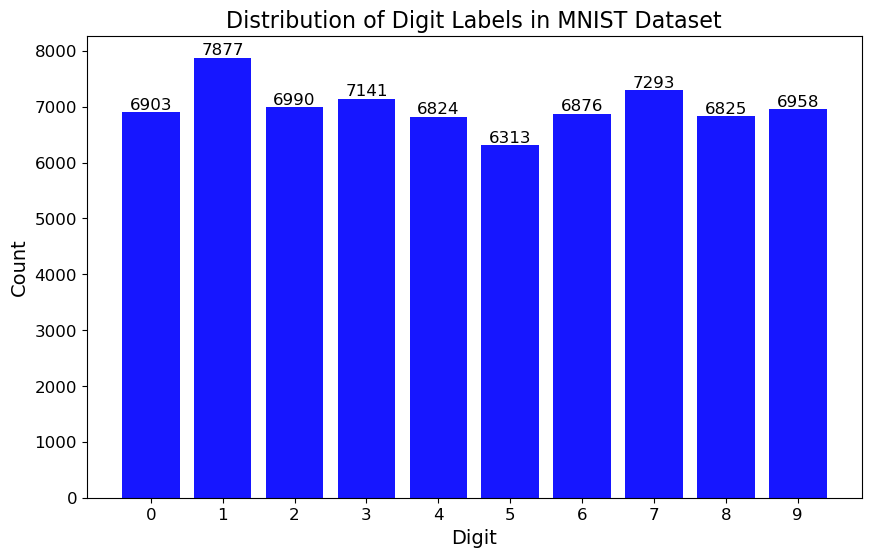

In [5]:
#d. Distribution of Labels
#Visualised the distribution of digit labels to see if the dataset is balanced:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each digit
label_counts = np.bincount(y)

# Create a bar plot for the distribution of labels
plt.figure(figsize=(10, 6))
bars = plt.bar(range(10), label_counts, color='blue', alpha=0.7)
plt.bar(range(10), label_counts, color='blue', alpha=0.7)
plt.xlabel('Digit', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Digit Labels in MNIST Dataset', fontsize=16)
plt.xticks(range(10), fontsize=12)
plt.yticks(fontsize=12)
# Add counts on top of each bar
for bar, count in zip(bars, label_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [6]:
#e. Check for Missing Values
#Check if there are any missing values in the dataset:
print(X.isnull().sum().sum())


0


In [7]:
#f. Correlation Analysis
#Since pixel values might not have a straightforward linear relationship, 
# correlation might not be very informative for image data. However, you can still compute it:

correlation_matrix = X.corr().abs()

# Check the correlation matrix size
print(correlation_matrix.shape)

correlation_matrix


(784, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
pixel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000176,0.000125,0.000089,0.206548,0.855512,1.0,NaN,NaN,NaN,NaN
pixel781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mean: Knowing the mean pixel values helps in understanding the overall intensity distribution of the dataset. For instance, if most images have a low mean, it suggests that the dataset has predominantly darker images.

Variance: Variance provides insight into the diversity of the pixel intensities within each image. High variance images might have more detailed information, while low variance images might be more uniform or blank.

In [8]:
#g. Feature Analysis
#a. Mean and Variance of Pixel Values
#Examine the mean and variance of pixel values for a few samples:
print("Average pixel value")
print(X.mean(axis=1).head())
print("Variance of pixel value")
print(X.var(axis=1).head())
print("Standard deviation of pixel value")
print(X.std(axis=1).head())




Average pixel value
0    35.108418
1    39.661990
2    24.799745
3    21.855867
4    29.609694
dtype: float64
Variance of pixel value
0    6352.038039
1    7046.042691
2    4306.196117
3    4371.995802
4    5538.156534
dtype: float64
Standard deviation of pixel value
0    79.699674
1    83.940709
2    65.621613
3    66.121069
4    74.418792
dtype: float64


##### 2. Data Normalization:


Normalize the pixel values to a range of 0 to 1 to ensure uniformity in the
input data scale.

In [9]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the pixel values to the range [0, 1]
X_normalized = scaler.fit_transform(X)

# Print the minimum and maximum values of the normalized dataset to confirm
print(f"Min value in X_normalized: {X_normalized.min()}")
print(f"Max value in X_normalized: {X_normalized.max()}")

Min value in X_normalized: 0.0
Max value in X_normalized: 1.0


#####  3. Data Visualization:

This code is designed to visualize handwritten digits from the MNIST dataset. It first imports the necessary plotting library, matplotlib.pyplot. The plot_digit function is defined to take in an image's data and its label, reshape the image data into a 28x28 grid, and then display it as a grayscale image with the label as the title. Finally, the code loops through the first five images in the dataset, using the plot_digit function to display each one with its corresponding label, allowing us to see what the handwritten digits look like.

In the MNIST dataset, each handwritten digit image is originally a 28x28 pixel grid. However, when the data is loaded into a dataframe, each image is flattened into a single row of 784 pixels (since 28 x 28 = 784). This format is convenient for numerical processing but not for visualizing the images as they were originally intended.

Reshaping the data back into a 28x28 grid serves the following purposes:

Visualization: It allows us to see the image in its original form, which is how the human eye would naturally interpret the handwritten digit. Each pixel's position in the grid corresponds to its position in the actual image, making it easy to recognize the digit.

Intuition: Viewing the data as a 28x28 grid helps us understand what the machine learning model is processing. It translates abstract numerical data into a visual format that humans can easily grasp.



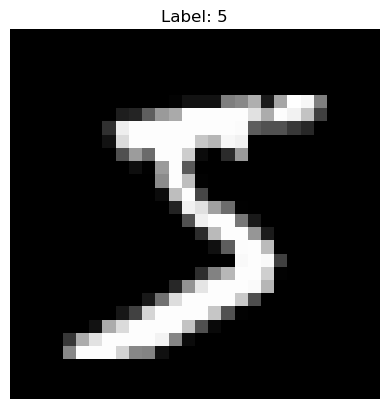

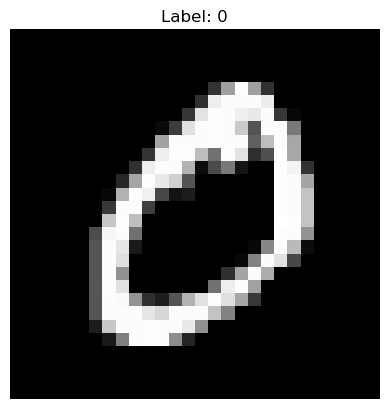

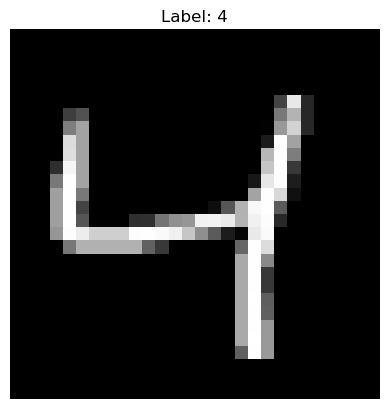

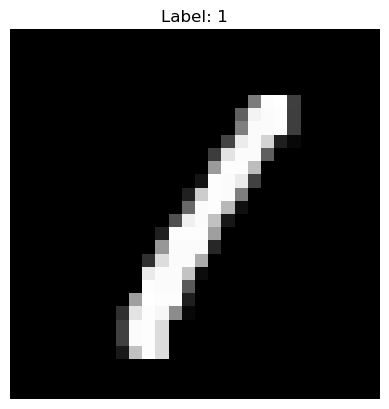

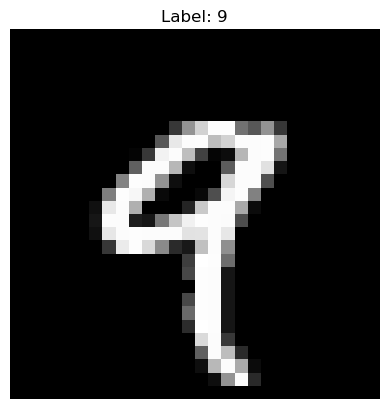

In [10]:
# Visualize a subset of images using matplotlib to get a sense of what the
# handwritten digits look like

import matplotlib.pyplot as plt

# Function to plot a digit
def plot_digit(data, label):
    image = data.values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Plot the first 5 images in the dataset
for i in range(5):
    plot_digit(X.iloc[i], y.iloc[i])


##### 4. Dimensionality Reduction (Optional):


Apply PCA to reduce the dimensionality of the dataset while preserving
most of the variance.

This code takes the large and complex MNIST dataset, which contains 70,000 images of handwritten digits, and simplifies it into a 2D plot using a technique called Principal Component Analysis (PCA). PCA reduces the dataset from its original high-dimensional form (with each image being a 784-dimensional point) to just two dimensions. This makes it easier to visualize and understand patterns within the data. After transforming the data, the code creates a scatter plot where each point represents an image, colored by the digit it represents. This visual representation helps to see how different digits are distributed and grouped in the simplified 2D space.

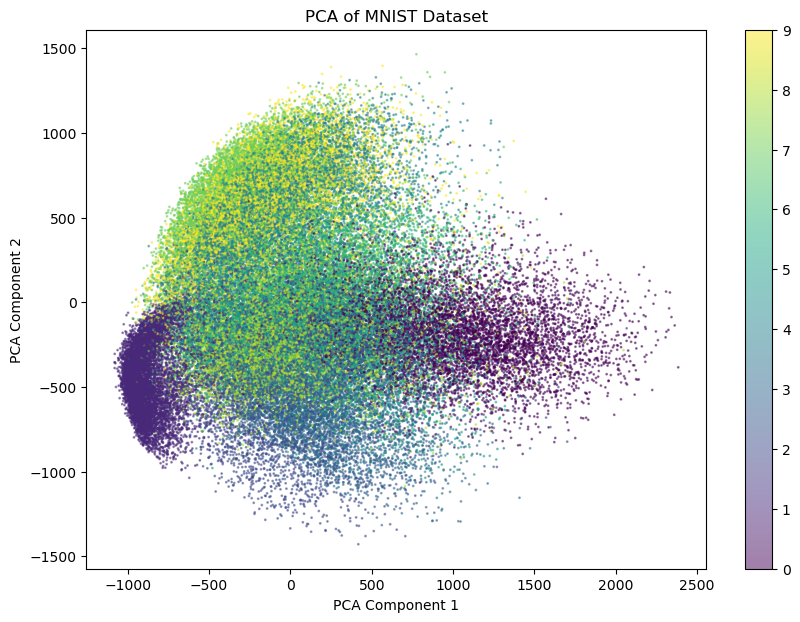

In [11]:
#Use PCA to reduce dimensionality and visualize data in 2D space:

from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the first two PCA components
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap='viridis', s=1, alpha=0.5)
plt.colorbar(scatter)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of MNIST Dataset')
plt.show()


#### Part 2: Machine Learning Models

Split the Dataset into Training and Testing Sets:

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert X_normalized to a pandas DataFrame
X_df = pd.DataFrame(X_normalized)

# Remove columns that have only one unique value
cols_to_keep = X_df.nunique() > 1
X_filtered = X_df.loc[:, cols_to_keep]

# Split the filtered dataset into training and testing sets (60,000 train and 10,000 test)
X_train_unfiltered, X_test_unfiltered, y_train_unfiltered, y_test_unfiltered = train_test_split(X_df, y, test_size=1/7, random_state=42)

# Using the filtered features for the models that are not using tensorflow
X_train, X_test, y_train, y_test =  X_train_unfiltered.loc[:, cols_to_keep], X_test_unfiltered.loc[:, cols_to_keep], y_train_unfiltered, y_test_unfiltered

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: (60000, 719)
Testing set size: 10000


Select Machine Learning Algorithms:

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define the models
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', multi_class='auto'),
    "Random Forest": RandomForestClassifier()

}

Functions used throughout for evaluation
- getting of evaluation metrics
- printing of evaluation metrics
- creating of visual confusion matrix 

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def get_evaluation_metrics(y_true, y_pred):
    """
    Calculates and returns the evaluation metrics for the model.
    
    Args:
    - y_true (array): The true labels.
    - y_pred (array): The predicted labels.
    
    Returns:
    - metrics (dict): A dictionary containing accuracy, precision, recall, and F1-score.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cm':cm
    }

    return metrics

def print_evaluation_metrics(model_name, y_true, y_pred):
    """
    Prints the evaluation metrics for the model and returns them.
    
    Args:
    - model_name (str): The name of the model.
    - y_true (array): The true labels.
    - y_pred (array): The predicted labels.
    
    Returns:
    - metrics (dict): A dictionary containing accuracy, precision, recall, and F1-score.
    """
    metrics = get_evaluation_metrics(y_true, y_pred)

    print(f"{model_name} - Accuracy: {metrics['accuracy']:.6f}, Precision: {metrics['precision']:.6f}, Recall: {metrics['recall']:.6f}, F1-score: {metrics['f1']:.6f}")




def plot_confusion_matrix(model_name, y_true=None, y_pred=None, cm=None):
    """
    Plots the confusion matrix for the model. If a precomputed confusion matrix is provided, it will use that.
    
    Args:
    - model_name (str): The name of the model.
    - y_true (array): The true labels.
    - y_pred (array): The predicted labels.
    - cm (array): Precomputed confusion matrix.
    """
    
    if cm is None:
        if y_true is None or y_pred is None:
            raise ValueError("If 'cm' is not provided, both 'y_true' and 'y_pred' must be provided.")
        cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Example usage:
# Assuming y_test and y_pred are the true and predicted labels respectively, and class_names is a list of class names
# print_evaluation_metrics("MyModel", y_test, y_pred)
# plot_confusion_matrix("MyModel", y_test, y_pred, class_names)


Train and Evaluate Each Model

This code evaluates multiple machine learning models on a dataset using common performance metrics and visualizes their classification results. It iterates through each model specified in the models dictionary, trains each model on a training dataset (X_train, y_train), and then predicts outcomes for a test dataset (X_test). For each model, it computes metrics such as accuracy, precision, recall, and F1-score to assess how well each model performs in classifying data. Additionally, it generates a confusion matrix—a visual summary of the model's predictions compared to the actual outcomes. The confusion matrix helps understand where the model correctly predicts labels and where it misclassifies them. After evaluating and visualizing each model, it prints the results and concludes by confirming the completion of training and evaluation for all models.

Training Logistic Regression...


/Users/masegomodibane/miniconda3/envs/py-tf-torch-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.919900, Precision: 0.919727, Recall: 0.919900, F1-score: 0.919760


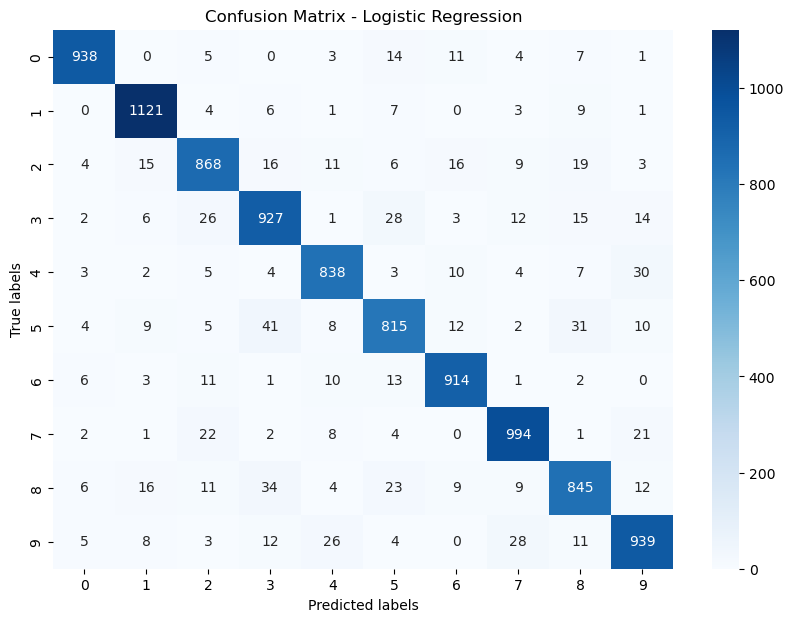

Training Random Forest...
Random Forest - Accuracy: 0.966800, Precision: 0.966869, Recall: 0.966800, F1-score: 0.966793


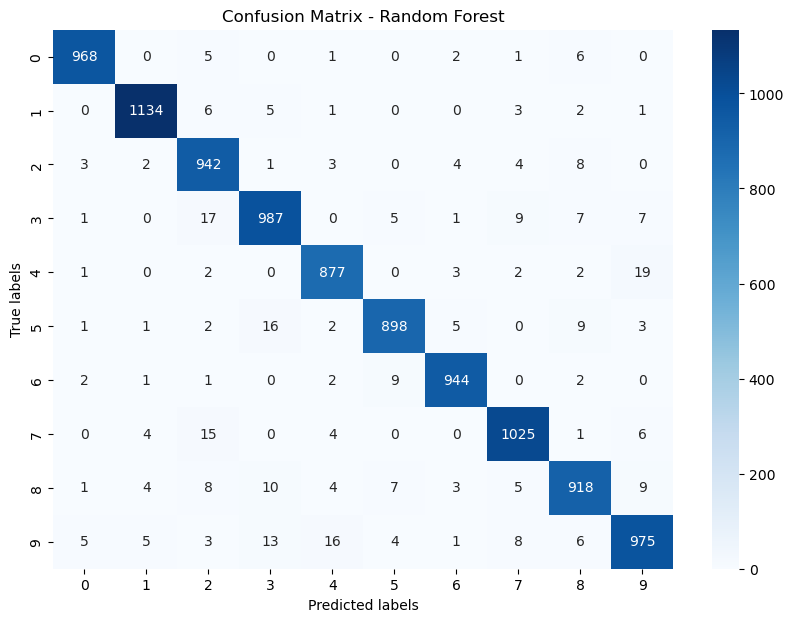

Training and evaluation completed.


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    eval_metrics = get_evaluation_metrics(y_test, y_pred)
    
    results[model_name] = {
        "accuracy": eval_metrics['accuracy'],
        "precision": eval_metrics['precision'],
        "recall": eval_metrics['recall'],
        "f1_score": eval_metrics['f1'],
        "confusion_matrix": eval_metrics['cm']
    }
    
    # Print evaluation metrics
    print_evaluation_metrics(model_name, y_test, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(model_name,y_true= y_test, y_pred=y_pred)


print("Training and evaluation completed.")

#### Part 3: Hyperparameter Tuning

This code aims to find the best configuration (hyperparameters) for two machine learning models—Random Forest and Gradient Boosting—using a technique called Grid Search Cross-Validation. Grid Search tries different combinations of hyperparameters defined in param_grids for each model to determine which combination yields the best performance on unseen data. It iterates through each model, performing grid search to find the optimal settings. After identifying the best parameters, it evaluates each model's performance using metrics like accuracy, precision, recall, and F1-score on a test dataset (X_test, y_test). Finally, it visualizes the confusion matrix for each optimized model, which shows how well the models predict actual versus predicted outcomes. This process helps in selecting the most effective model configuration for accurate predictions.

Performing Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 300}
Performing Grid Search for Logistic Regression...


/Users/masegomodibane/miniconda3/envs/py-tf-torch-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/masegomodibane/miniconda3/envs/py-tf-torch-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Evaluating optimised Random Forest...
Random Forest - Accuracy: 0.965500, Precision: 0.965572, Recall: 0.965500, F1-score: 0.965505
Evaluating optimised Logistic Regression...
Logistic Regression - Accuracy: 0.920800, Precision: 0.920617, Recall: 0.920800, F1-score: 0.920641
Evaluation of optimised models completed.


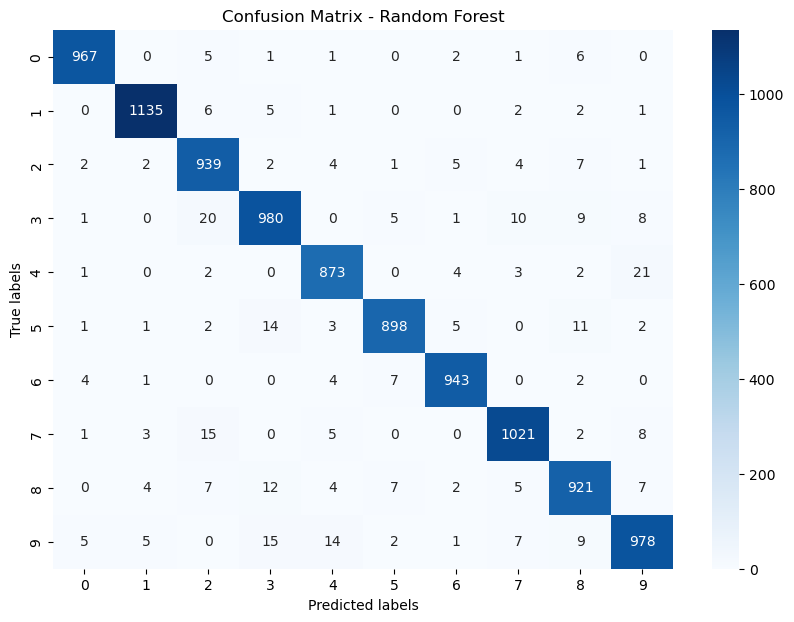

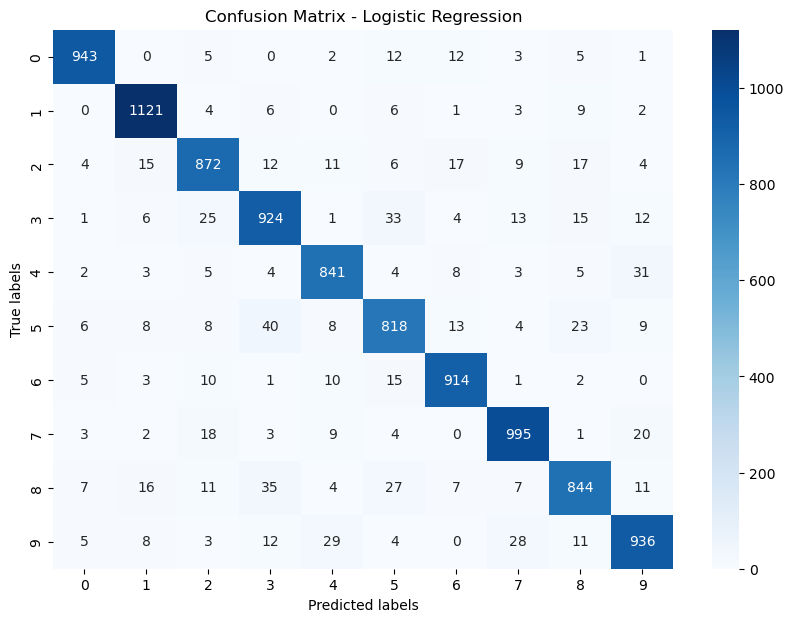

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200, 300], #The number of trees in the forest.
        "max_depth": [10, 20, 30], #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "min_samples_split": [10, 20] #The minimum number of samples required to split an internal node
    },
    "Logistic Regression": {
        "C": [ 0.1, 1, 10],
        "solver": ['lbfgs','newton-cg','sag','saga'] #Algorithm to use in the optimization problem.
    }
}

# Dictionary to store the best models
best_models = {}

# Loop through each model and perform grid search
for model_name, param_grid in param_grids.items():
    print(f"Performing Grid Search for {model_name}...")
    model = models[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate each optimized model
optimised_results = {}

for model_name, model in best_models.items():
    print(f"Evaluating optimised {model_name}...")
    y_pred = model.predict(X_test)
    
    eval_metrics = get_evaluation_metrics(y_test, y_pred)
    
    optimised_results[model_name] = {
        "accuracy": eval_metrics['accuracy'],
        "precision": eval_metrics['precision'],
        "recall": eval_metrics['recall'],
        "f1_score": eval_metrics['f1'],
        "confusion_matrix": eval_metrics['cm']
    }
    
    # Print evaluation metrics
    print_evaluation_metrics(model_name, y_test, y_pred)

print("Evaluation of optimised models completed.")

# Plot confusion matrices
for model_name, result in optimised_results.items():
    cm = result["confusion_matrix"]
    plot_confusion_matrix(model_name,cm=cm)


This code snippet performs two main tasks: printing evaluation results and visualizing performance metrics for optimized machine learning models. Firstly, it iterates through optimized_results to print key evaluation metrics—accuracy, precision, recall, and F1-score—for each model. These metrics help understand how well each model predicts outcomes and handles different aspects like correctness, completeness, and balance in predictions. Secondly, it plots Receiver Operating Characteristic (ROC) curves and Precision-Recall curves for each model in best_models. ROC curves show how well the models distinguish between classes by plotting the trade-off between true positive rate and false positive rate, while Precision-Recall curves highlight the balance between precision (positive predictive value) and recall (sensitivity) as thresholds change. These visualizations provide insights into the models' overall performance and help in comparing their effectiveness in differentiating and predicting outcomes.

---- Random Forest ----
Accuracy: 0.9655
Precision: 0.9656
Recall: 0.9655
F1-score: 0.9655
Confusion Matrix:
[[ 967    0    5    1    1    0    2    1    6    0]
 [   0 1135    6    5    1    0    0    2    2    1]
 [   2    2  939    2    4    1    5    4    7    1]
 [   1    0   20  980    0    5    1   10    9    8]
 [   1    0    2    0  873    0    4    3    2   21]
 [   1    1    2   14    3  898    5    0   11    2]
 [   4    1    0    0    4    7  943    0    2    0]
 [   1    3   15    0    5    0    0 1021    2    8]
 [   0    4    7   12    4    7    2    5  921    7]
 [   5    5    0   15   14    2    1    7    9  978]]

---- Logistic Regression ----
Accuracy: 0.9208
Precision: 0.9206
Recall: 0.9208
F1-score: 0.9206
Confusion Matrix:
[[ 943    0    5    0    2   12   12    3    5    1]
 [   0 1121    4    6    0    6    1    3    9    2]
 [   4   15  872   12   11    6   17    9   17    4]
 [   1    6   25  924    1   33    4   13   15   12]
 [   2    3    5    4  841    4 

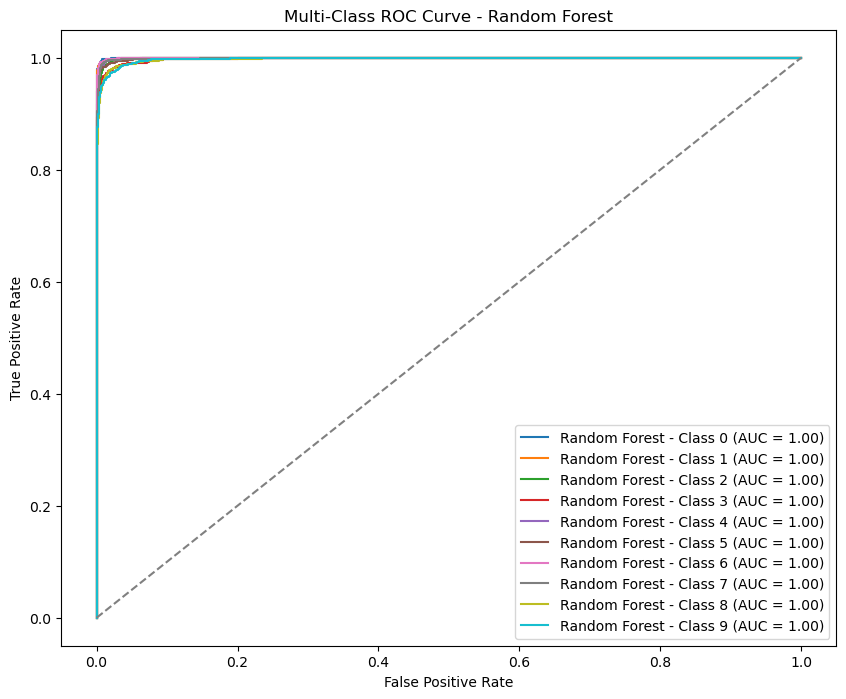

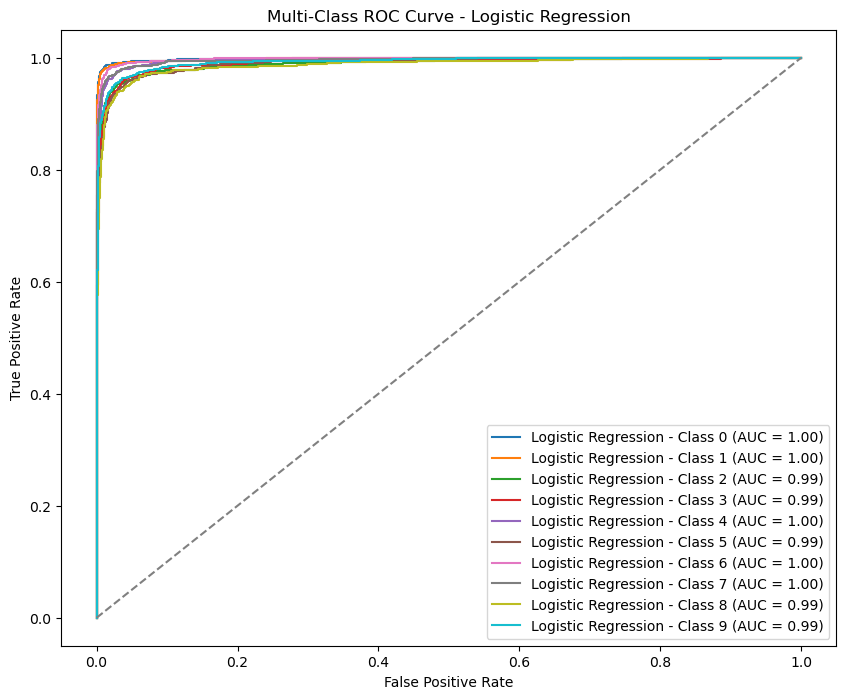

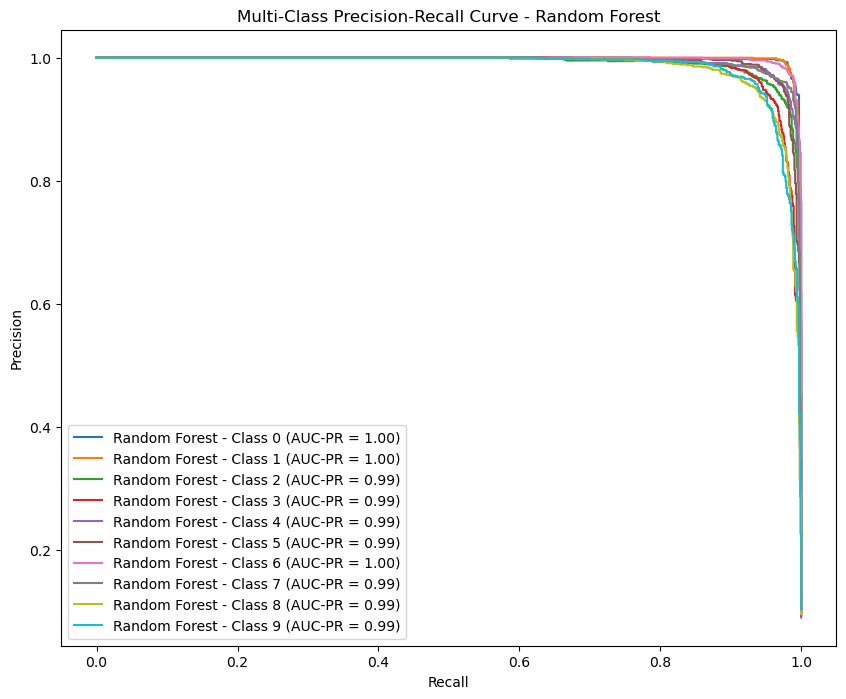

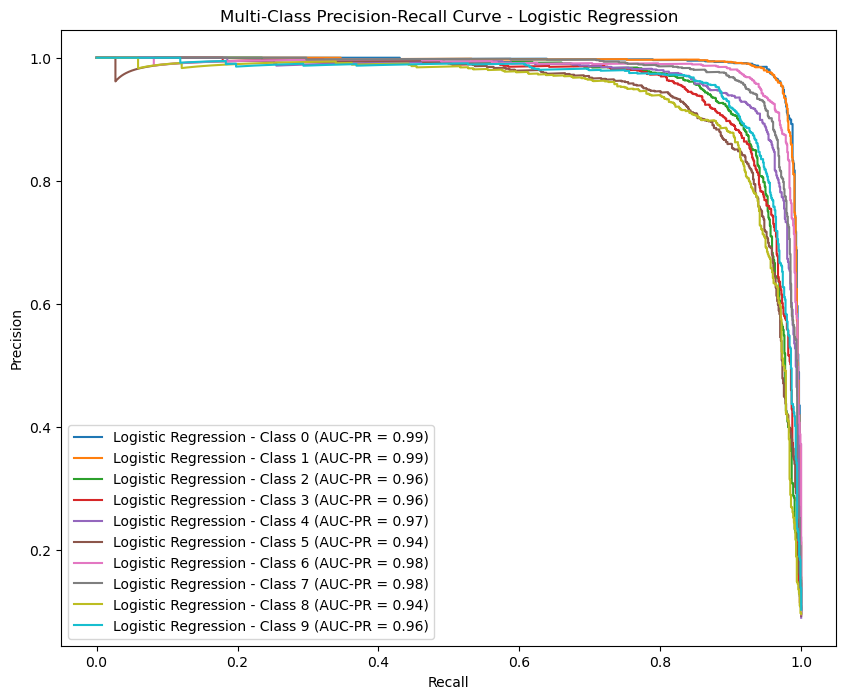

In [17]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure y_test is in numerical format
y_test_numerical = y_test.astype(int)
num_classes = len(np.unique(y_test_numerical))

# Print results
for model_name, result in optimised_results.items():
    print(f"---- {model_name} ----")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-score: {result['f1_score']:.4f}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")

# Binarize the labels for multi-class ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test_numerical, classes=np.unique(y_test_numerical))

# Visualize ROC curves for each class and model
#plt.figure(figsize=(10, 8))
for model_name, model in best_models.items():
    y_scores = model.predict_proba(X_test)
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} - Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-Class ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# Visualize Precision-Recall curves for each class and model
#plt.figure(figsize=(10, 8))
for model_name, model in best_models.items():
    y_scores = model.predict_proba(X_test)
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{model_name} - Class {i} (AUC-PR = {pr_auc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Multi-Class Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()


#### CNN using Tensorflow 

In [18]:
#importing of tensorflow libraries
import tensorflow
from  tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models


print('TensorFlow version:',tensorflow.__version__)
print('Keras version:',keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.4.1


Reshape: Make sure the images are in the right shape.
Categorical: Convert the labels to a format the model can use. The code converts these labels into a format called "one-hot encoding".
ImageDataGenerator: Prepare the data, including splitting it for training and validation.
Flow: Create batches of data for the model to process during training.
Overall, this code prepares your image data and labels in the right format for training a neural network, and it creates tools to feed this data into the model in an efficient way.

In [19]:
# Reshape data to fit the model (samples, height, width, channels)
X_train_reshaped = np.array(X_train_unfiltered).reshape((X_train_unfiltered.shape[0], 28, 28, 1))
X_test_reshaped = np.array(X_test_unfiltered).reshape((X_test_unfiltered.shape[0], 28, 28, 1))


# Convert labels to categorical
y_train_categorical = to_categorical(y_train_unfiltered)
y_test_categorical = to_categorical(y_test_unfiltered)

# Create ImageDataGenerator instances
datagen = ImageDataGenerator(validation_split=0.3)

# Prepare training and validation data
train_generator = datagen.flow(X_train_reshaped, y_train_categorical, batch_size=30, subset='training')
validation_generator = datagen.flow(X_train_reshaped, y_train_categorical, batch_size=30, subset='validation')

print('Data generators ready')



Data generators ready


In [20]:
# Define class labels for MNIST dataset
class_indices = {str(i): i for i in range(10)}

# Get the class names
classnames = list(class_indices.keys())
print(classnames)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [21]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Get the input shape from the training data
input_shape = X_train_reshaped.shape[1:]

# Get the number of classes from y_train_categorical
num_classes = y_train_categorical.shape[1]

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=input_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2, 2)))

# We can add as many layers as we think necessary - here we'll add another convolution with smaller filters and max pooling layer
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# And another set with even smaller filters
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.2))

# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())


/Users/masegomodibane/miniconda3/envs/py-tf-torch-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 23, 23, 32)     │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 32)       │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,178 (106.16 KB)

 Trainable params: 27,178 (106.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
num_epochs = 10
batch_size = 30  # Define the batch size if not already defined

# Calculate steps_per_epoch and validation_steps manually
steps_per_epoch = len(X_train_reshaped) // batch_size
validation_steps = len(X_train_reshaped) // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator, 
    validation_steps=validation_steps,
    epochs=num_epochs
)


Epoch 1/10
  24/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1105 - loss: 2.2802  

/Users/masegomodibane/miniconda3/envs/py-tf-torch-env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1396/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7650 - loss: 0.7152

2024-07-08 20:36:20.784453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/masegomodibane/miniconda3/envs/py-tf-torch-env/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8010 - loss: 0.6112 - val_accuracy: 0.9653 - val_loss: 0.1177
Epoch 2/10
  24/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9449 - loss: 0.2075

2024-07-08 20:36:22.687581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1395/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9564 - loss: 0.1454

2024-07-08 20:36:33.492683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9579 - loss: 0.1403 - val_accuracy: 0.9796 - val_loss: 0.0670
Epoch 3/10
  24/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9770 - loss: 0.0713

2024-07-08 20:36:35.300705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1394/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9728 - loss: 0.0903

2024-07-08 20:36:45.813155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9726 - loss: 0.0913 - val_accuracy: 0.9817 - val_loss: 0.0612
Epoch 4/10
  25/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9693 - loss: 0.0906

2024-07-08 20:36:47.448480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1399/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9766 - loss: 0.0753

2024-07-08 20:36:58.124514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9769 - loss: 0.0752 - val_accuracy: 0.9859 - val_loss: 0.0507
Epoch 5/10
  24/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9780 - loss: 0.0857

2024-07-08 20:36:59.825828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1393/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9824 - loss: 0.0608

2024-07-08 20:37:10.588995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9823 - loss: 0.0608 - val_accuracy: 0.9880 - val_loss: 0.0425
Epoch 6/10
   1/2000 ━━━━━━━━━━━━━━━━━━━━ 5:54 177ms/step - accuracy: 0.9667 - loss: 0.0527

2024-07-08 20:37:12.288870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1399/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9840 - loss: 0.0530

2024-07-08 20:37:22.979886: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9840 - loss: 0.0534 - val_accuracy: 0.9875 - val_loss: 0.0470
Epoch 7/10
  25/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9919 - loss: 0.0279

2024-07-08 20:37:24.573619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1396/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9862 - loss: 0.0450

2024-07-08 20:37:35.035881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9873 - val_loss: 0.0455
Epoch 8/10
  25/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9862 - loss: 0.0573

2024-07-08 20:37:36.626346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1397/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9877 - loss: 0.0411

2024-07-08 20:37:47.160303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.9886 - val_loss: 0.0414
Epoch 9/10
  25/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9903 - loss: 0.0249   

2024-07-08 20:37:48.759029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1399/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9889 - loss: 0.0353

2024-07-08 20:37:59.259372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9880 - val_loss: 0.0409
Epoch 10/10
  25/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9882 - loss: 0.0459

2024-07-08 20:38:00.876937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1400/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9897 - loss: 0.0343

2024-07-08 20:38:11.454949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9894 - loss: 0.0353 - val_accuracy: 0.9886 - val_loss: 0.0400


2024-07-08 20:38:13.199124: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


View loss history (checking for overfitting)

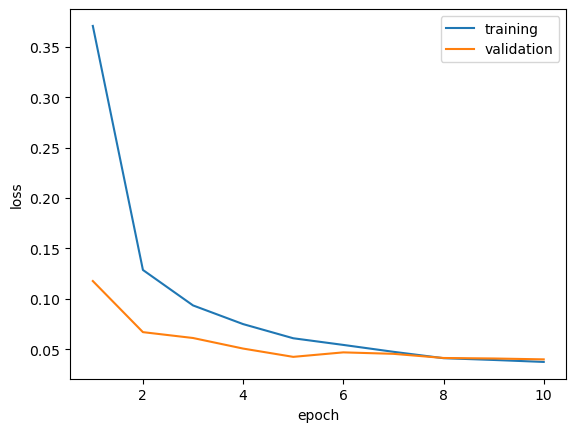

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


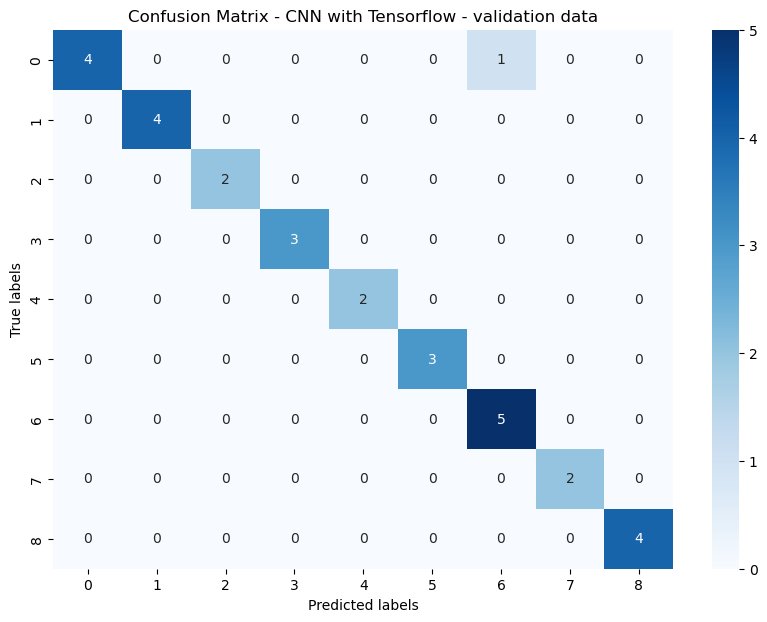

In [24]:
#checking performance using the validation data for one batch of the data


import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)


# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plot_confusion_matrix("CNN with Tensorflow - validation data",cm=cm)


In [25]:
# Save the trained model
modelFileName = 'mnist_cnn_tensorflow.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as mnist_cnn_tensorflow.h5


In [26]:


classifier = models.load_model(modelFileName) # loads the saved model

# Use the model to predict the image class
class_probabilities = classifier.predict(X_test_reshaped)

# Find the class predictions with the highest predicted probability
index = int(np.argmax(class_probabilities, axis=1)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Generating predictions from test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


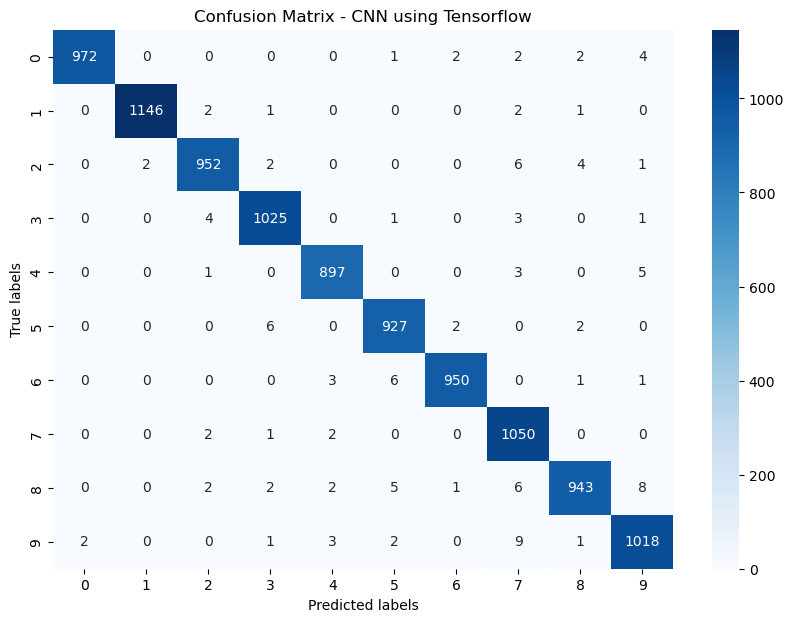

CNN using Tensorflow - Accuracy: 0.988000, Precision: 0.988065, Recall: 0.988000, F1-score: 0.988006


In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from test data...")


# Use the model to predict the class
class_probabilities = classifier.predict(X_test_reshaped)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test_categorical, axis=1)

model_name = "CNN using Tensorflow"

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plot_confusion_matrix(model_name,cm=cm)

print_evaluation_metrics(model_name,true_labels,predictions )


### DNN using Tensorflow

In [28]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 3.4.1
TensorFlow version: 2.16.1


In [29]:
from sklearn.model_selection import train_test_split

# Set data types for float features
x_train_dnn = X_train_unfiltered.astype('float32')
x_test_dnn = X_test_unfiltered.astype('float32')

y_train_dnn = to_categorical(y_train_unfiltered)

# Split the data into training and validation sets
x_train_dnn, x_val_dnn, y_train_dnn, y_val_dnn = train_test_split(x_train_dnn, y_train_dnn, test_size=0.3, random_state=42)

# Convert labels to categorical (if not already done)
y_train_categorical = to_categorical(y_train_dnn)
y_val_categorical = to_categorical(y_val_dnn)
y_test_dnn = to_categorical(y_test_unfiltered)


print('Ready...')

Ready...


In [30]:
len(x_train_dnn)

42000

In [31]:
len(x_train_dnn.columns)

784

In [32]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(x_train_dnn.columns), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(classnames), input_dim=hl, activation='softmax'))

print(model.summary())

/Users/masegomodibane/miniconda3/envs/py-tf-torch-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
y_test_dnn.shape


(10000, 10)

In [34]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 10 epochs 
num_epochs = 10
history = model.fit(x_train_dnn, y_train_dnn, epochs=num_epochs, validation_data=(x_val_dnn, y_val_dnn))

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 782us/step - accuracy: 0.6335 - loss: 1.1398 - val_accuracy: 0.8927 - val_loss: 0.3748
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.9015 - loss: 0.3409 - val_accuracy: 0.9161 - val_loss: 0.2983
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.9191 - loss: 0.2802 - val_accuracy: 0.9231 - val_loss: 0.2753
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.9269 - loss: 0.2548 - val_accuracy: 0.9261 - val_loss: 0.2653
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.9323 - loss: 0.2398 - val_accuracy: 0.9274 - val_loss: 0.2600
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.9342 - loss: 0.2299 - val_accuracy: 0.9293 - val_loss: 0.2566
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.9358 - loss: 0.2223 - val_accuracy: 0.9304 - val_loss: 0.2551
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.9375 -

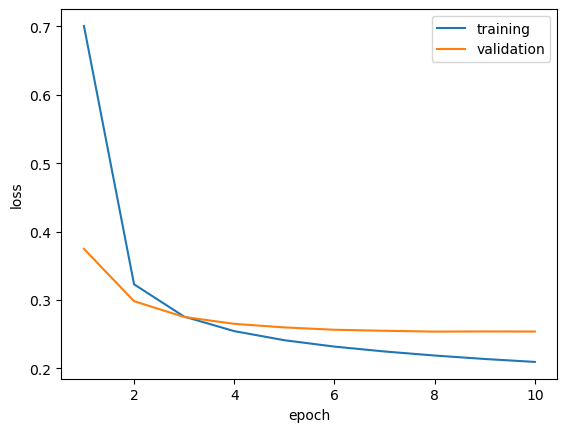

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [36]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.03623872 -0.01126979 -0.05762928 ...  0.08221801  0.00162473
   0.06039498]
 [ 0.08529756 -0.03705263  0.00981952 ... -0.05123077 -0.05384161
   0.00950922]
 [-0.04367012 -0.00760266 -0.00221786 ... -0.03063358 -0.06397452
   0.06383034]
 ...
 [-0.06985537 -0.07175729  0.05080921 ... -0.05154174  0.03781332
   0.08073803]
 [-0.04918195 -0.0241387  -0.01600168 ...  0.01919813 -0.08453961
   0.04739416]
 [ 0.00530536 -0.04534431 -0.04149444 ... -0.03493879  0.06082808
  -0.0374561 ]] 
Biases:
 [ 0.32797244  0.1907392   0.298402    0.0434521   0.33439887  0.01258098
 -0.41378215  0.35685554  0.0271721   0.16132152]
------------
Weights:
 [[ 0.8305486  -0.32464913  0.57737297 -0.02862803 -0.19316341 -0.30982673
  -0.09610518 -0.40096486 -0.28157657 -0.5203897 ]
 [ 0.4262116  -0.6072746  -0.4831902  -0.07856888  0.2931365  -0.06241471
   0.47164917 -0.35992387 -0.39006892 -0.86082864]
 [ 0.1509002   0.86001176 -0.02544392  0.14849527  0.6051978  -0.19193426
   0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


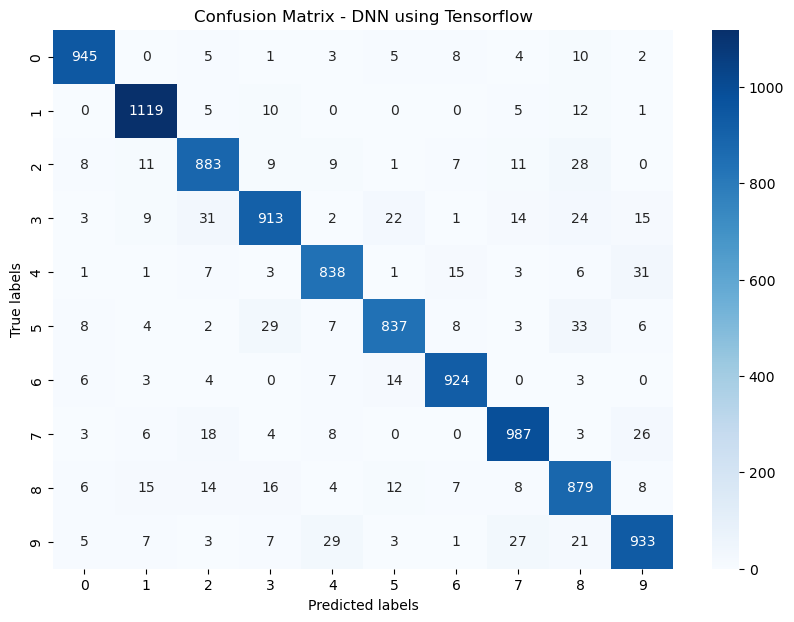

DNN using Tensorflow - Accuracy: 0.925800, Precision: 0.926027, Recall: 0.925800, F1-score: 0.925755


In [37]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test_dnn)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test_dnn, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
model_name = "DNN using Tensorflow"
plot_confusion_matrix(model_name, cm=cm)
print_evaluation_metrics(model_name,true_labels,predictions)
